In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import sys
sys.path.insert(0, '..//src/')

d:\Profile data Cardiff\Cardiff University\Energy Data - Documents\General\code\degree-days-analysis\notebooks
d:
Profile data Cardiff
Cardiff University
Energy Data - Documents
General
code
degree-days-analysis
notebooks
d:\


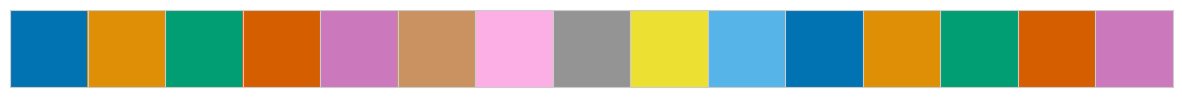

In [23]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import seaborn as sns
import sys
import random
import main
from common import enums, viz_functions
from pathlib import Path

random.seed(42)

# blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]
# sns.set_palette(sns.color_palette("Paired", 10))
# sns.set_style("white")
sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
export_fig_format = "pdf"
fig_format = "png"
dpi = 300
figsize = (12, 3.5)
figsize_map = (16, 8)
sns.palplot(sns.color_palette())

markers = ['P', 'o', '^', 's', '*', 'v']
linewidth = 0.1
edgecolor = 'black'

print(os.getcwd())
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "sceac10":
        break    
    else: computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)


In [24]:
PATH_ONEDRIVE = Path(r'D:\Profile data Cardiff\OneDrive - Cardiff University')
path_gb_data = PATH_ONEDRIVE / r'04 - Projects\00 - Final data\Annual_demand'

In [25]:
scenario = 'after'
gb_df = pd.read_csv(path_gb_data /
                    f"GB_Annual_heat_demand_{scenario}_EE_LSOA.csv", index_col=0)
gb_df.head()

,Lsoa11cd,Msoa11cd,Road length (m),Area (km2),Average heat demand after energy efficiency measures for detached gas boiler (kWh),Average heat demand after energy efficiency measures for detached oil boiler (kWh),Average heat demand after energy efficiency measures for detached resistance heating (kWh),Average heat demand after energy efficiency measures for detached biomass boiler (kWh),Average heat demand after energy efficiency measures for flat gas boiler (kWh),Average heat demand after energy efficiency measures for flat oil boiler (kWh),...,Number of semi-detached gas boiler in 2011,Number of semi-detached oil boiler in 2011,Number of semi-detached resistance heating in 2011,Number of semi-detached biomass boiler in 2011,Number of terraced gas boiler in 2011,Number of terraced oil boiler in 2011,Number of terraced resistance heating in 2011,Number of terraced biomass boiler in 2011,Region,Local authority
0,S01006506,S02001236,7144.704905,4.388802,17533.867465,19188.338395,12421.661777,25067.327542,6345.682390,9060.830466,...,50.0,6.0,2.0,0.0,30.0,0.0,1.0,1.0,North East Scotland,aberdeen city
1,S01006507,S02001236,3562.459752,0.221747,17923.774795,13757.559918,10184.000000,25067.327542,7425.669120,9060.830466,...,51.0,0.0,8.0,0.0,114.0,0.0,23.0,0.0,North East Scotland,aberdeen city
2,S01006508,S02001236,2689.130582,0.270195,18591.328478,20481.357955,13352.226064,25067.327542,6777.056946,9060.830466,...,18.0,0.0,4.0,0.0,36.0,0.0,2.0,0.0,North East Scotland,aberdeen city
3,S01006509,S02001236,2029.960587,0.096254,17752.107015,20481.357955,12506.961340,25067.327542,6574.791345,9060.830466,...,64.0,0.0,9.0,1.0,68.0,0.0,5.0,1.0,North East Scotland,aberdeen city
4,S01006510,S02001236,2312.863906,0.180077,18234.389031,20481.357955,12421.661777,25067.327542,6431.907359,9060.830466,...,96.0,2.0,2.0,0.0,35.0,1.0,1.0,0.0,North East Scotland,aberdeen city


In [26]:
list_columns = [x for x in gb_df.columns if "Average heat demand after" in x]
list_columns

['Average heat demand after energy efficiency measures for detached gas boiler (kWh)',
 'Average heat demand after energy efficiency measures for detached oil boiler (kWh)',
 'Average heat demand after energy efficiency measures for detached resistance heating (kWh)',
 'Average heat demand after energy efficiency measures for detached biomass boiler (kWh)',
 'Average heat demand after energy efficiency measures for flat gas boiler (kWh)',
 'Average heat demand after energy efficiency measures for flat oil boiler (kWh)',
 'Average heat demand after energy efficiency measures for flat resistance heating (kWh)',
 'Average heat demand after energy efficiency measures for flat biomass boiler (kWh)',
 'Average heat demand after energy efficiency measures for semi-detached gas boiler (kWh)',
 'Average heat demand after energy efficiency measures for semi-detached oil boiler (kWh)',
 'Average heat demand after energy efficiency measures for semi-detached resistance heating (kWh)',
 'Average he

In [31]:
to_plot_df = pd.DataFrame()
to_plot_df.index = gb_df['Lsoa11cd'].values
to_plot_df["Total heat demand after energy efficiency measures (kWh)"] = gb_df[
    list_columns].sum(axis=1).values
to_plot_df.head()

,Total heat demand after energy efficiency measures (kWh)
S01006506,203262.586666
S01006507,193495.024170
S01006508,203392.992356
S01006509,199877.531850
S01006510,200663.930990


In [28]:
path_map = PATH_ONEDRIVE / r'04 - Projects\00 - Final data\maps'
file = "UK_2011_Census_boundaries_LSOA_fixed.geojson"
path_map = path_map / file

In [41]:
len(to_plot_df)

41728

In [40]:
map_df = viz_functions.get_map(path_map)
len(map_df)

42148

In [32]:
map_df = pd.merge(map_df, to_plot_df, left_on='GeographyCode', right_index=True)
map_df.head()

,OBJECTID,AREA_ID,AREA_NAME,MaxSimpTol,MinSimpTol,OBJECTID_1,GeographyCode,KS601EW0001,KS601EW0002,KS601EW0003,...,KS601EW0015,Full_time_PC,Part_time_PC,Unemployed_PC,Retired_PC,_errors,layer,path,geometry,Total heat demand after energy efficiency measures (kWh)
0,1024,E01027993,Ashfield 012C,75,75.00,34840.0,E01027993,1158.0,197.0,409.0,...,17.0,35.319516,17.012090,3.626943,20.811744,Nested shells,Fixed geometries,MultiPolygon?crs=EPSG:4326&field=OBJECTID:inte...,"MULTIPOLYGON (((-1.30514 53.04483, -1.30785 53...",147512.386285
1,48,E01020056,Mid Devon 008C,75,75.00,27061.0,E01020056,1517.0,201.0,488.0,...,9.0,32.168754,13.249835,2.241266,13.843111,Nested shells,Fixed geometries,MultiPolygon?crs=EPSG:4326&field=OBJECTID:inte...,"MULTIPOLYGON (((-3.41207 50.80506, -3.41064 50...",139423.294148
2,271,E01024364,Maidstone 017A,75,18.75,31279.0,E01024364,1162.0,157.0,384.0,...,7.0,33.046472,13.511188,2.581756,19.018933,Nested shells,Fixed geometries,MultiPolygon?crs=EPSG:4326&field=OBJECTID:inte...,"MULTIPOLYGON (((0.63841 51.14202, 0.63435 51.1...",148917.244927
3,636,E01018284,South Cambridgeshire 003C,75,75.00,25312.0,E01018284,932.0,160.0,417.0,...,5.0,44.742489,17.167382,1.609442,14.377682,Nested shells,Fixed geometries,MultiPolygon?crs=EPSG:4326&field=OBJECTID:inte...,"MULTIPOLYGON (((-0.00408 52.26949, -0.02667 52...",122545.876035
4,3080,E01027595,Hambleton 010B,75,75.00,34445.0,E01027595,1158.0,182.0,414.0,...,6.0,35.751295,15.716753,2.072539,19.170984,Nested shells,Fixed geometries,MultiPolygon?crs=EPSG:4326&field=OBJECTID:inte...,"MULTIPOLYGON (((-1.18272 54.04060, -1.18525 54...",169494.100114


In [ ]:
len(map_df)

In [36]:
gb_df[list_columns].boxplot()

Total heat demand after energy efficiency measures (kWh)    319936.119105
dtype: float64

In [37]:
len(map_df)

34753

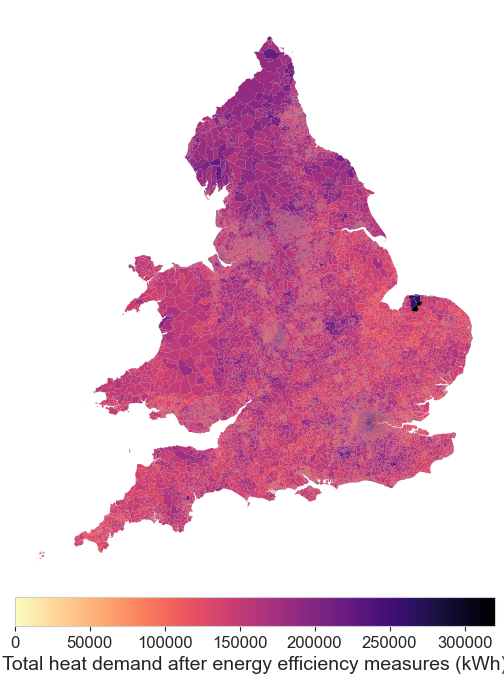

In [35]:
fig, ax = plt.subplots(figsize=(figsize_map))
cmap_1 = 'magma_r'
target = "Total heat demand after energy efficiency measures (kWh)"
viz_functions.plot_map(
    map_df,
    target,
    ax,
    vmin=0,
    cmap=cmap_1,
    legend=True,
    label_legend="Total heat demand after energy efficiency measures (kWh)")
fig

In [14]:
len(map_df)

42148

In [ ]:
plot_map(